<a href="https://colab.research.google.com/github/lmcanavals/acomplex/blob/main/06_02_kosaraju.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import graphviz as gv

In [ ]:
def reverseGraph(G):
  n = len(G)
  Grev = [[] for _ in range(n)]

  for u in range(n):
    for v in G[u]:
      Grev[v].append(u)

  return Grev

In [ ]:
def dfs(G, u, lst, visited):
  visited[u] = True
  for v in G[u]:
    if not visited[v]:
      dfs(G, v, lst, visited)

  lst.append(u)

In [ ]:
def kosaraju(G):
  n = len(G)
  visited = [False]*n
  f = []

  Grev = reverseGraph(G)            # step 1

  for u in range(n):                # step 2
    if not visited[u]:
      dfs(Grev, u, f, visited)

  visited = [False]*n               # step 3
  scc = []
  for u in reversed(f):
    if not visited[u]:
      cc = []
      dfs(G, u, cc, visited)
      scc.append(cc)

  return scc

In [ ]:
%%file 1.in
-
4
8
6
7
2
9
1
5 6
3 7

Writing 1.in


In [ ]:
with open("1.in") as f:
  G = []
  for line in f:
    if line == "-\n":
      G.append([])
    else:
      G.append([int(x) for x in line.split()])

print(G)

[[], [4], [8], [6], [7], [2], [9], [1], [5, 6], [3, 7]]


In [ ]:
def show(G, labels=None, directed=False, weighted=False, path=[], layout="sfdp"):
  g = gv.Digraph("alegria") if directed else gv.Graph("felicidad")
  g.graph_attr["layout"] = layout
  g.edge_attr["color"] = "gray"
  g.edge_attr["fontsize"] = "8"
  g.node_attr["color"] = "orangered"
  g.node_attr["width"] = "0.1"
  g.node_attr["height"] = "0.1"
  g.node_attr["fontsize"] = "8"
  g.node_attr["fontcolor"] = "mediumslateblue"
  n = len(G)

  for u in range(n):
    g.node(str(u), labels[u] if labels else str(u))

  added = set()
  for v, u in enumerate(path):
    if u >= 0:
      if weighted:
        for vi, w in G[u]:
          if vi == v:
            break

        g.edge(str(u), str(v), str(w), dir="forward", penwidt="2", color="orange")
      else:
        g.edge(str(u), str(v), dir="forward", penwidt="2", color="orange")

      added.add(f"{u}->{v}")
      added.add(f"{v}->{u}")
  if weighted:
    for u in range(n):
      for v, w in G[u]:
        if not directed and not f"{u}->{v}" in added:
          added.add(f"{u}->{v}")
          added.add(f"{v}->{u}")
          g.edge(str(u), str(v), str(w))
        elif directed:
          g.edge(str(u), str(v), str(w))
  else:
    for u in range(n):
      for v in G[u]:
        if not directed and not f"{u}->{v}" in added:
          added.add(f"{u}->{v}")
          added.add(f"{v}->{u}")
          g.edge(str(u), str(v))
        elif directed:
          g.edge(str(u), str(v))
  return g

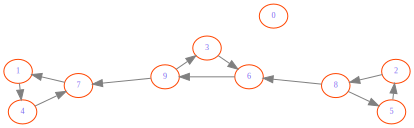

In [ ]:
show(G, directed=True)

In [ ]:
kosaraju(G)

[[7, 4, 1], [6, 3, 9], [2, 5, 8], [0]]